Dataset Loaded Successfully!

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       15 non-null     int64  
 1   sex       15 non-null     int64  
 2   cp        15 non-null     int64  
 3   trestbps  15 non-null     int64  


✅ LOGISTIC REGRESSION RESULTS:
Accuracy: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3


✅ RANDOM FOREST RESULTS:
Accuracy: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


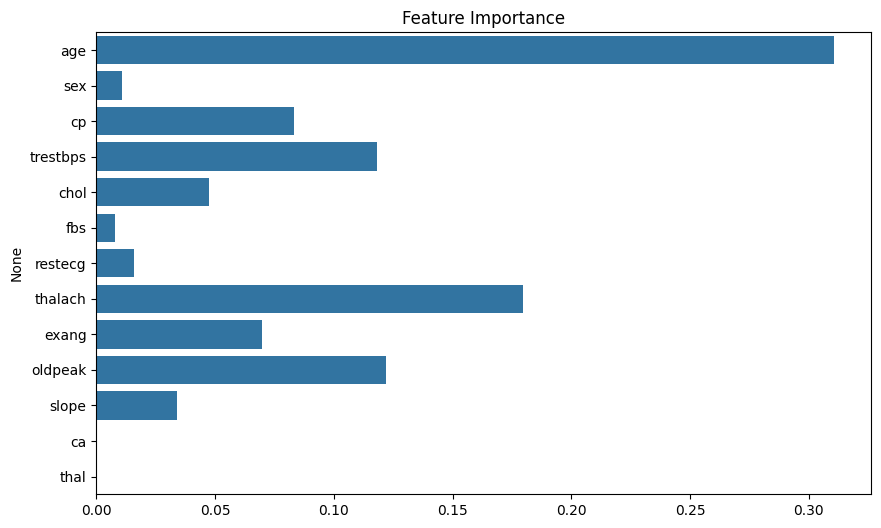

In [ ]:
# ----------------------------------------------
# ✅ HEART DISEASE PREDICTION PROJECT (NO UPLOAD)
# ----------------------------------------------

import pandas as pd
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# ----------------------------------------------
# ✅ STEP 1: EMBEDDED DATASET (NO FILE REQUIRED)
# ----------------------------------------------

csv_data = """
age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
57,1,2,150,168,0,1,174,0,1.6,2,0,2,1
54,1,0,140,239,0,1,160,0,1.2,2,0,2,1
48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
49,1,1,130,266,0,1,171,0,0.6,2,0,2,1
64,1,3,110,211,0,0,144,1,1.8,1,0,2,0
58,0,3,150,283,1,0,162,0,1.0,2,0,2,1
"""

df = pd.read_csv(StringIO(csv_data))

# ----------------------------------------------
# ✅ STEP 2: DATA PREVIEW
# ----------------------------------------------

print("Dataset Loaded Successfully!\n")
print(df.head())

# ----------------------------------------------
# ✅ STEP 3: CHECK INFO & NULL VALUES
# ----------------------------------------------

print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

# ----------------------------------------------
# ✅ STEP 4: VISUALIZATION
# ----------------------------------------------

plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df)
plt.title("Heart Disease Distribution (0 = No, 1 = Yes)")
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# ----------------------------------------------
# ✅ STEP 5: PREPARE DATA
# ----------------------------------------------

X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ----------------------------------------------
# ✅ STEP 6: LOGISTIC REGRESSION
# ----------------------------------------------

log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("\n✅ LOGISTIC REGRESSION RESULTS:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

# ----------------------------------------------
# ✅ STEP 7: RANDOM FOREST
# ----------------------------------------------

rf_model = RandomForestClassifier(n_estimators=120, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\n✅ RANDOM FOREST RESULTS:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# ----------------------------------------------
# ✅ STEP 8: CONFUSION MATRIX
# ----------------------------------------------

cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ----------------------------------------------
# ✅ STEP 9: FEATURE IMPORTANCE
# ----------------------------------------------

plt.figure(figsize=(10,6))
sns.barplot(x=rf_model.feature_importances_, y=X.columns)
plt.title("Feature Importance")
plt.show()
